SUPPORT VECTOR MACHINES (SVM)

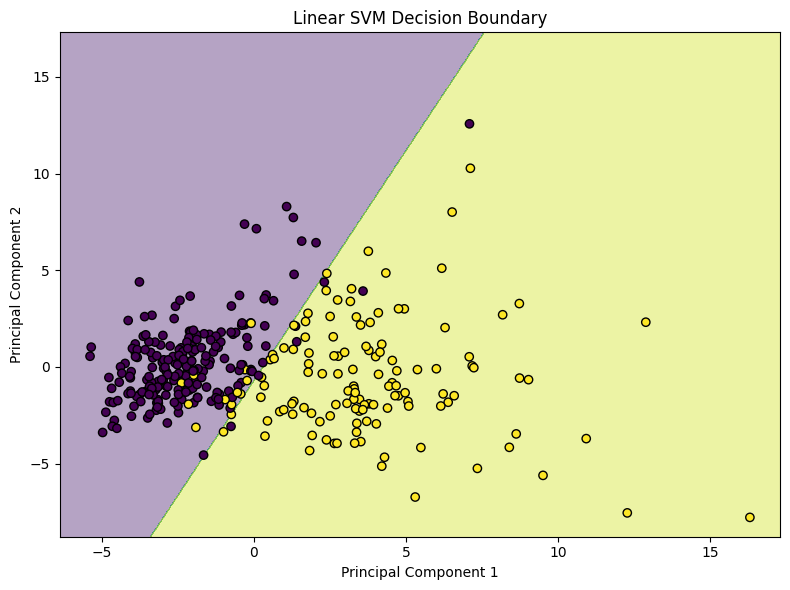

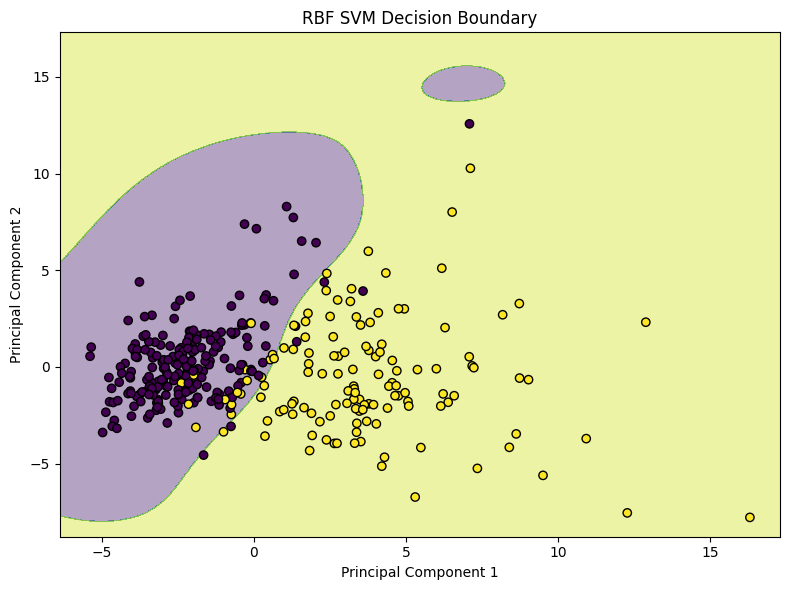

Best Parameters  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Test Set Accuracy  0.9385964912280702


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
#load dataset
df = pd.read_csv('cancer_dataset.csv')
# Convert diagnosis to numeric values Benign(0),Malignant (1)
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})
#drop idr columns if present
if 'id' in df.columns:
    df.drop(columns=['id'],inplace=True)
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']
#normalize features before PCA
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
# Reduce dimensions for visualization
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
# Split the dataset
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.4,random_state=42)
#train linear and RBF SVM models
svm_linear=SVC(kernel='linear',C=1)
svm_linear.fit(X_train,y_train)
svm_rbf=SVC(kernel='rbf',C=1,gamma='scale')
svm_rbf.fit(X_train,y_train)
#function to visualize decision boundaries
def plot_decision_boundary(model,X,y,title):
    h = 0.02
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:, ].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                         np.arange(y_min,y_max,h))
    Z=model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx,yy,Z,alpha=0.4,cmap='viridis')
    plt.scatter(X[:,0],X[:,1],c=y,edgecolor='k',cmap='viridis')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.show()
# Visualize both models
plot_decision_boundary(svm_linear,X_train,y_train,"Linear SVM Decision Boundary")
plot_decision_boundary(svm_rbf,X_train,y_train,"RBF SVM Decision Boundary")
# Perform hyperparameter tuning on the RBF SVM
param_grid = {
    'C':[0.1,1,10],
    'gamma':['scale',0.01,0.001],
    'kernel':['rbf']
}
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
# Evaluate the best model
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)
print("Best Parameters ",grid_search.best_params_)
print("Test Set Accuracy ",accuracy_score(y_test,y_pred))
